In [ ]:
import numpy as np  


                    pais  uso diario agua per capita(litros) sentimiento_agua
0            Afghanistan                                 NaN  Bajo (Negativo)
1                Albania                                 NaN  Bajo (Negativo)
2                Algeria                               669.0  Medio (Neutral)
3                 Angola                               100.0  Bajo (Negativo)
4    Antigua and Barbuda                               361.0  Bajo (Negativo)
..                   ...                                 ...              ...
176            Venezuela                                 NaN  Bajo (Negativo)
177              Vietnam                                 NaN  Bajo (Negativo)
178                Yemen                               429.0  Bajo (Negativo)
179               Zambia                               404.0  Bajo (Negativo)
180             Zimbabwe                               764.0  Medio (Neutral)

[181 rows x 3 columns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_2224\3821866473.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimiento_agua', palette='coolwarm')


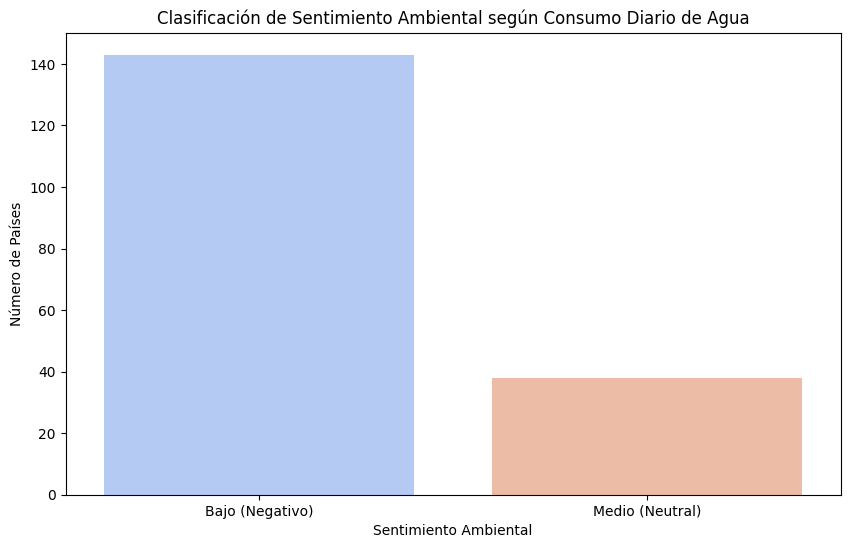

In [ ]:
# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 2. Cargar archivo JSON
with open('admin.consumo_agua.json', encoding='utf-8') as file:
    data = json.load(file)

# 3. Convertir a DataFrame
df = pd.json_normalize(data)

# 4. Limpieza de datos: convertir a tipo numérico
df['uso diario agua per capita(litros)'] = pd.to_numeric(df['uso diario agua per capita(litros)'], errors='coerce')

# 5. Función para aplicar análisis de "sentimiento ambiental"
def clasificar_sentimiento(uso_diario):
    if uso_diario >= 1000:
        return 'Alto (Positivo)'
    elif uso_diario >= 500:
        return 'Medio (Neutral)'
    else:
        return 'Bajo (Negativo)'

# 6. Aplicar la función
df['sentimiento_agua'] = df['uso diario agua per capita(litros)'].apply(clasificar_sentimiento)

# 7. Mostrar resultados
print(df[['pais', 'uso diario agua per capita(litros)', 'sentimiento_agua']])

# Visualizar resultados
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentimiento_agua', palette='coolwarm')
plt.title('Clasificación de Sentimiento Ambiental según Consumo Diario de Agua')
plt.xlabel('Sentimiento Ambiental')
plt.ylabel('Número de Países')
plt.show()



In [13]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 1. Librerías necesarias
import pandas as pd
import json
from textblob import TextBlob

# 2. Cargar archivo JSON
with open("admin.empleados.json", encoding="utf-8") as f:
    data = json.load(f)

# 3. Convertir a DataFrame
df = pd.json_normalize(data)

# 4. Función para analizar sentimiento del cargo
def analizar_sentimiento(texto):
    sentimiento = TextBlob(texto).sentiment.polarity
    if sentimiento > 0:
        return "Positivo"
    elif sentimiento < 0:
        return "Negativo"
    else:
        return "Neutral"

# 5. Aplicar análisis a la columna "Job_Title"
df["sentimiento"] = df["Job_Title"].apply(analizar_sentimiento)

# 6. Mostrar resultados
print(df[["Name", "Job_Title", "sentimiento"]])



                  Name Job_Title sentimiento
0     William Atherton   Manager     Neutral
1           Maria Isch   Manager     Neutral
2            Ryan Hand   Manager     Neutral
3           Sean Uribe   Manager     Neutral
4         Angel Nicely   Manager     Neutral
...                ...       ...         ...
9995       Anna Mcghee    Intern     Neutral
9996   Pierre Bridwell    Intern     Neutral
9997       Ethel Beuth    Intern     Neutral
9998     Paula Lamoine    Intern     Neutral
9999     Ronald Garcia    Intern     Neutral

[10000 rows x 3 columns]


In [ ]:
# Importar librerías
import pandas as pd
import json
from textblob import TextBlob

# Cargar archivo JSON
with open('admin.netflix.json', encoding='utf-8') as f:
    data = json.load(f)

# Convertir a DataFrame
df = pd.json_normalize(data)

# Aplicar análisis de sentimiento a la columna "Description"
def analizar_sentimiento(desc):
    polaridad = TextBlob(desc).sentiment.polarity
    if polaridad > 0:
        return 'Positivo'
    elif polaridad < 0:
        return 'Negativo'
    else:
        return 'Neutral'

df['sentimiento_descripcion'] = df['Description'].apply(analizar_sentimiento)

# Mostrar resultados
print(df[['Title', 'Description', 'sentimiento_descripcion']])


                                         Title  \
0          Adam Devine: Best Time of Our Lives   
1                      ADAM SANDLER 100% FRESH   
2                         Ali Wong: Baby Cobra   
3                    Ali Wong: Hard Knock Wife   
4                          Amy Schumer Growing   
...                                        ...   
4810                               West Beirut   
4811                            What We Wanted   
4812  Who Would You Take to a Deserted Island?   
4813                              You Carry Me   
4814                                      Zozo   

                                            Description  \
0     Frenetic comic Adam Devine talks teen awkwardn...   
1     From "Heroes" to "Ice Cream Ladies" – Adam San...   
2     Ali Wong's stand up special delves into her se...   
3     Two years after the hit "Baby Cobra," Ali Wong...   
4     Amy Schumer spills on her new marriage, person...   
...                                          

In [1]:
# Importar librerías necesarias
import pandas as pd
from textblob import TextBlob

# Cargar archivo CSV
df = pd.read_csv("datos_productos_falsificados_online.csv")

# Función para analizar sentimiento sobre 'metodo_pago'
def sentimiento_pago(metodo):
    polaridad = TextBlob(str(metodo)).sentiment.polarity
    if polaridad > 0:
        return "Positivo"
    elif polaridad < 0:
        return "Negativo"
    else:
        return "Neutral"

# Aplicar el análisis de sentimiento
df["sentimiento_pago"] = df["metodo_pago"].apply(sentimiento_pago)

# Mostrar resultados
print(df[["metodo_pago", "sentimiento_pago"]].drop_duplicates())


        metodo_pago sentimiento_pago
0       Credit Card          Neutral
122          PayPal          Neutral
237       Apple Pay          Neutral
331      Debit Card          Neutral
423   Wire Transfer          Neutral
424  Cryptocurrency          Neutral


                  duracion_sueno  ejercicio  estado_animo_num
duracion_sueno          1.000000  -0.040075          0.745291
ejercicio              -0.040075   1.000000          0.118624
estado_animo_num        0.745291   0.118624          1.000000


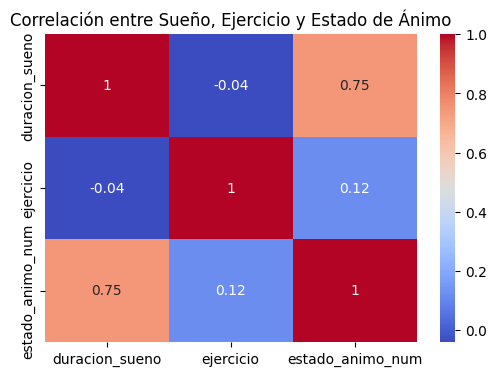

In [2]:
# 📌 1. Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 2. Cargar el archivo CSV
df = pd.read_csv("datos_rutina_diaria.csv")

# 📌 3. Convertir estado_animo a valor numérico
estado_map = {'Sad': -1, 'Neutral': 0, 'Happy': 1}
df['estado_animo_num'] = df['estado_animo'].map(estado_map)

# 📌 4. Mostrar correlación entre sueño, ejercicio y ánimo
print(df[['duracion_sueno', 'ejercicio', 'estado_animo_num']].corr())

# 📊 5. Visualizar con un mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(df[['duracion_sueno', 'ejercicio', 'estado_animo_num']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre Sueño, Ejercicio y Estado de Ánimo")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_9080\1607370675.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


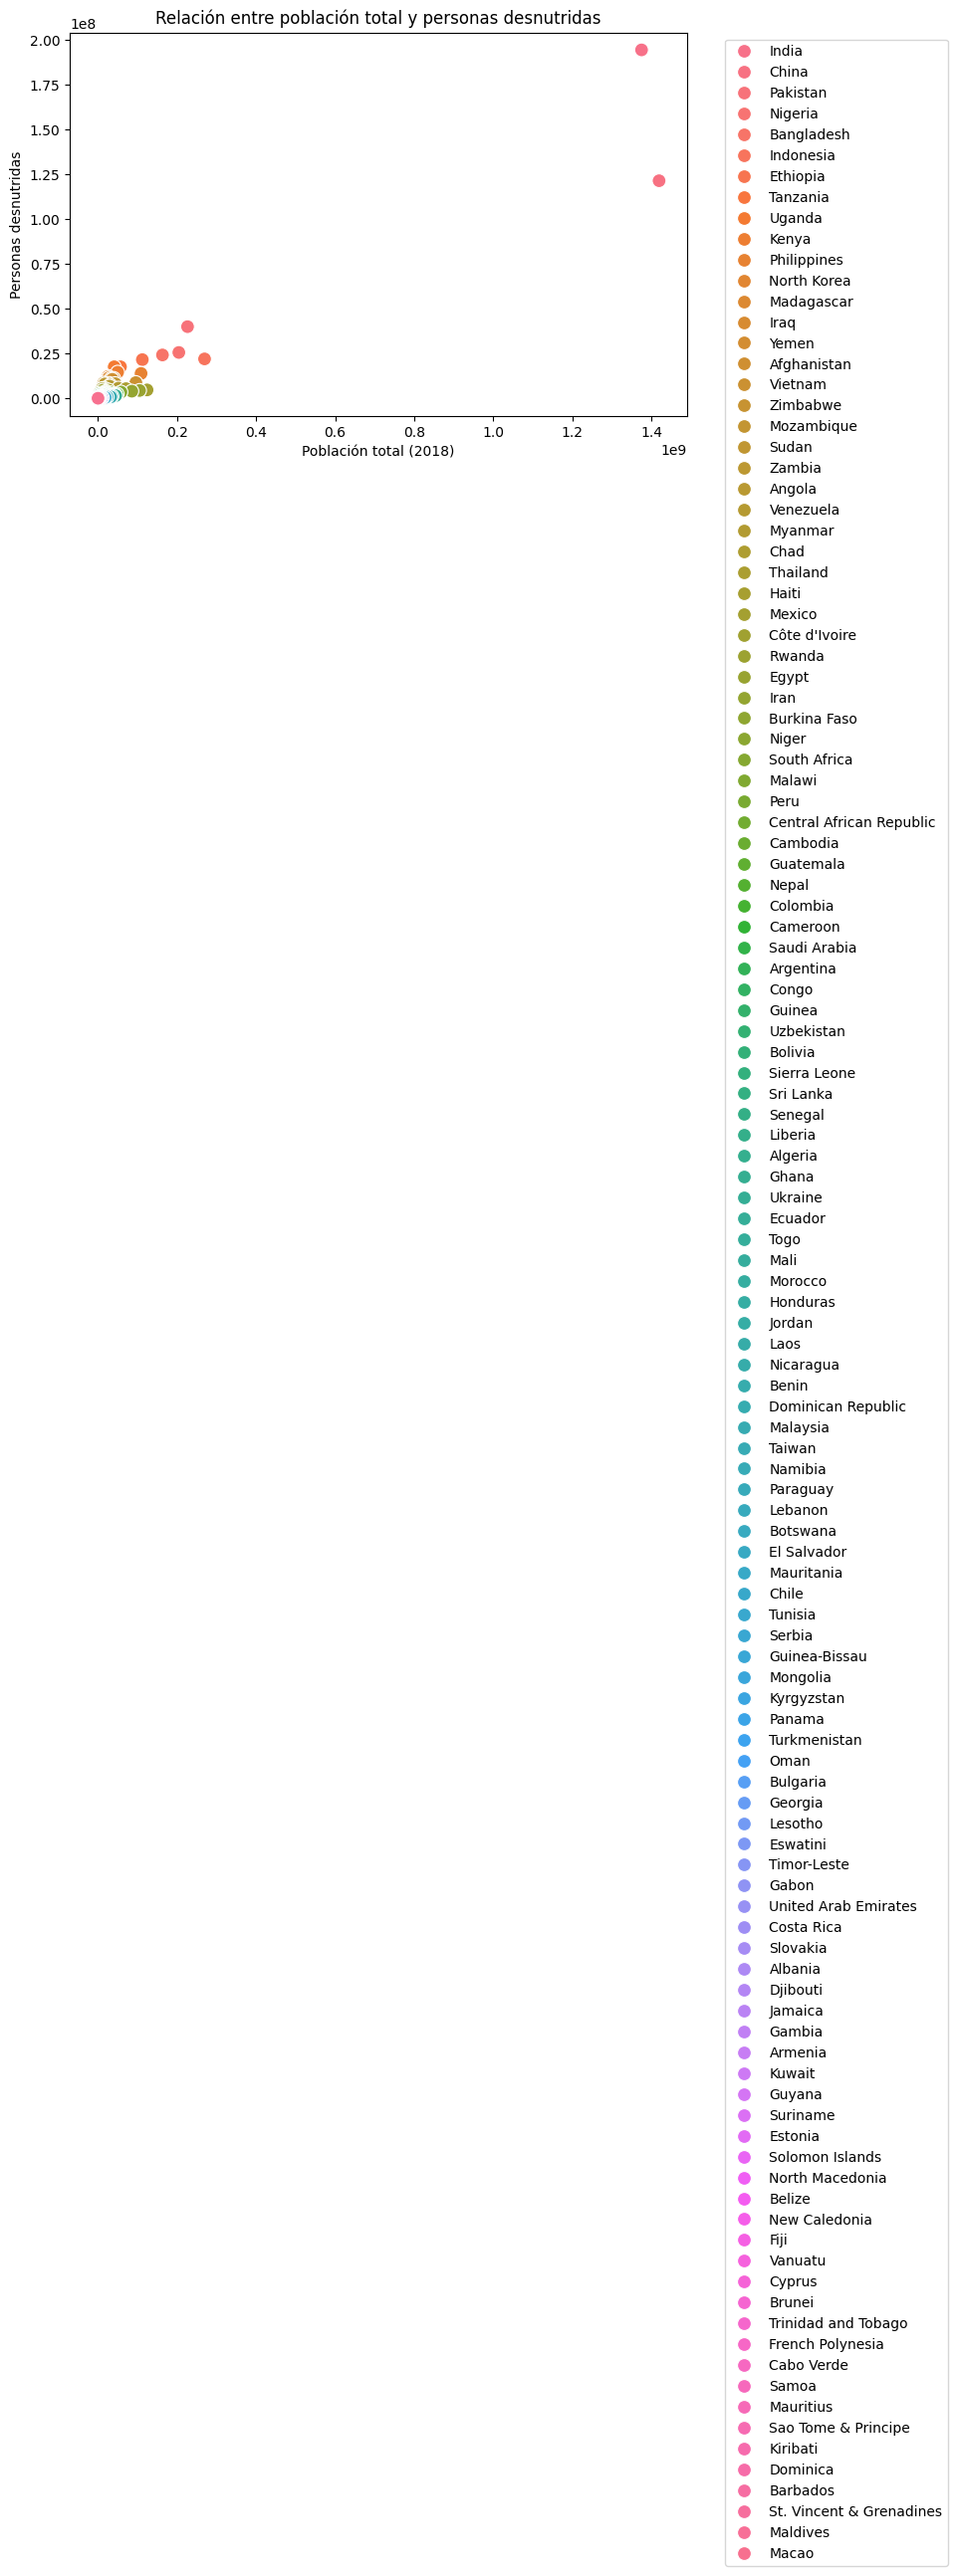

In [3]:
# 1. Importar librerías necesarias
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar archivo JSON
with open("desnutricion_mundo.json", encoding="utf-8") as f:
    data = json.load(f)

# 3. Convertir a DataFrame
df = pd.json_normalize(data)

# 4. Convertir columnas a tipo numérico
df["personas desnutridas"] = pd.to_numeric(df["personas desnutridas"], errors="coerce")
df["poblacion(2018)"] = pd.to_numeric(df["poblacion(2018)"], errors="coerce")
df["porcentaje de la poblacion"] = pd.to_numeric(df["porcentaje de la poblacion"], errors="coerce")

# 5. Visualizar relación: población vs. personas desnutridas
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="poblacion(2018)", y="personas desnutridas", hue="pais", s=100)
plt.title("Relación entre población total y personas desnutridas")
plt.xlabel("Población total (2018)")
plt.ylabel("Personas desnutridas")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Columnas detectadas: ['pais', 'reservas_2016', 'porcentaje_mundial']
Primera fila:
         pais  reservas_2016  porcentaje_mundial
0  Venezuela   299953000000               18.17


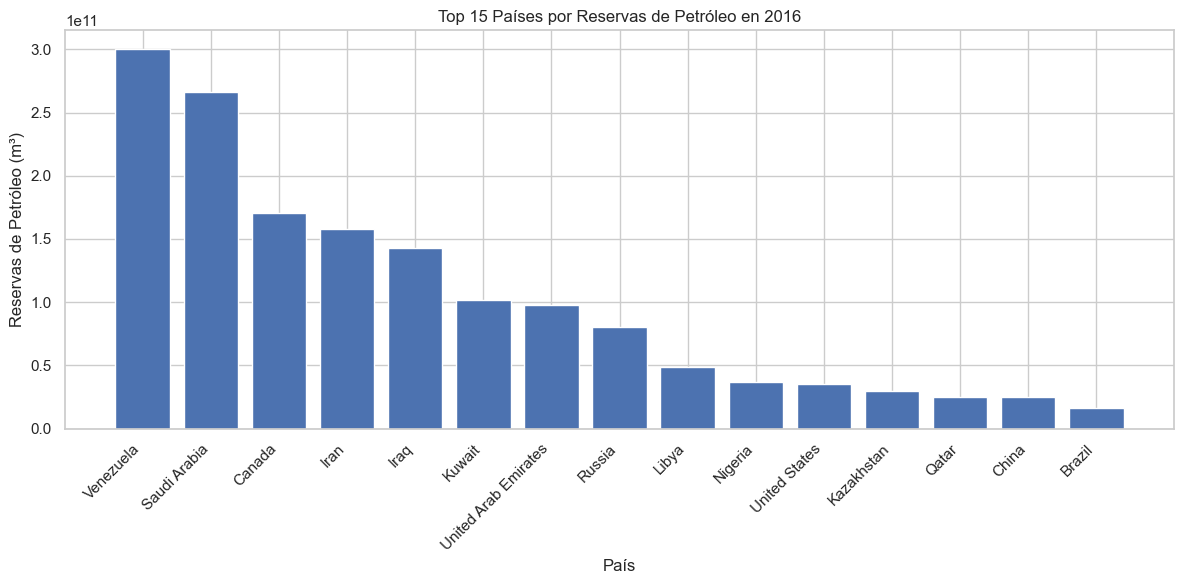

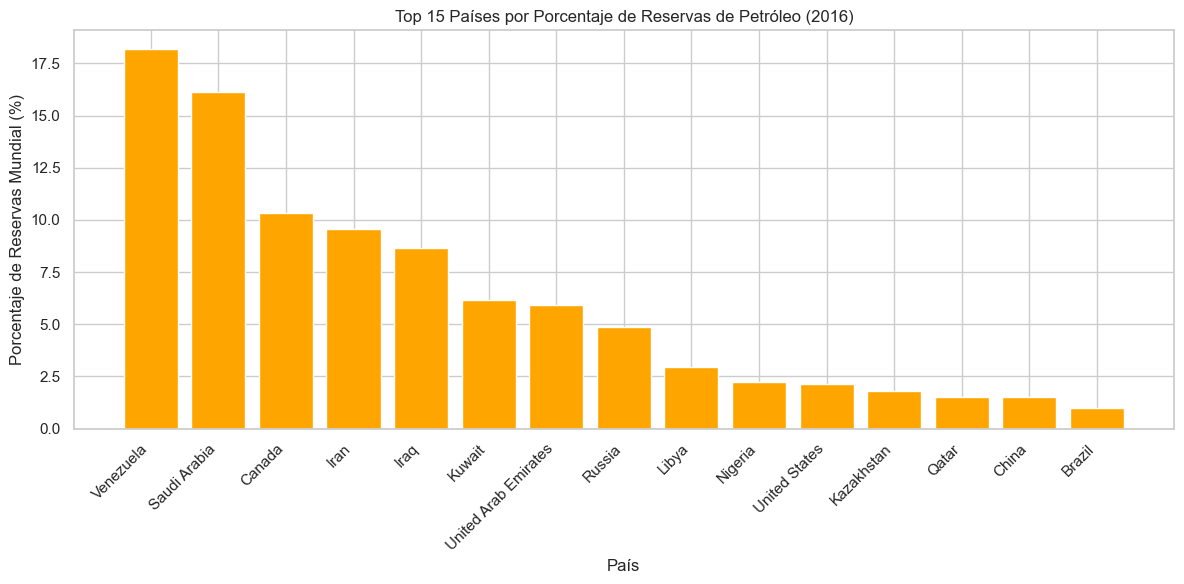

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "reservas_petroleo_limpio.csv"
df = pd.read_csv(csv_path, encoding="utf-8")
print("Columnas detectadas:", list(df.columns))
print("Primera fila:\n", df.head(1))
df.rename(columns={
    'pais': 'País',
    'reservas_2016': 'Reservas_2016',
    'porcentaje_mundial': 'Pct_Mundial'
}, inplace=True)

df_sorted = df.sort_values('Reservas_2016', ascending=False).head(15)
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['País'], df_sorted['Reservas_2016'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('País')
plt.ylabel('Reservas de Petróleo (m³)')
plt.title('Top 15 Países por Reservas de Petróleo en 2016')
plt.tight_layout()
plt.show()

df_sorted_pct = df.sort_values('Pct_Mundial', ascending=False).head(15)
plt.figure(figsize=(12, 6))
plt.bar(df_sorted_pct['País'], df_sorted_pct['Pct_Mundial'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel('País')
plt.ylabel('Porcentaje de Reservas Mundial (%)')
plt.title('Top 15 Países por Porcentaje de Reservas de Petróleo (2016)')
plt.tight_layout()
plt.show()


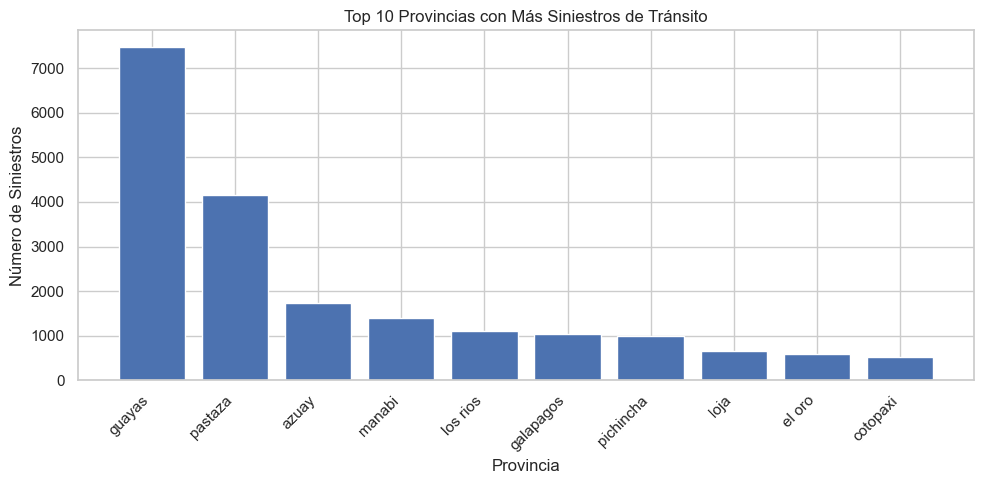

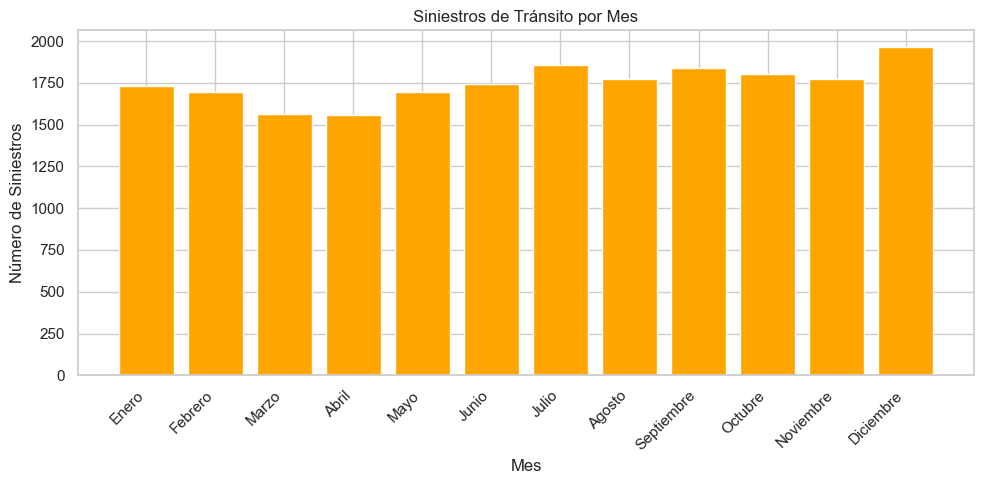

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Leer el CSV con separador 
csv_path = "siniestros_transito.csv"
df = pd.read_csv(csv_path, sep=';', encoding="utf-8", quotechar='"')

df.rename(columns={
    'provincia': 'Provincia',
    'mes': 'Mes',
    'dia': 'Día',
    'hora': 'Hora',
    'clase': 'Clase',
    'causa': 'Causa',
    'num_fallecidos': 'Fallecidos',
    'num_lesionados': 'Lesionados',
    'total_victimas': 'Total_Víctimas'
}, inplace=True)

# 3. Gráfico 1: Top 10 Provincias con más siniestros
prov_counts = df['Provincia'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(prov_counts.index, prov_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Provincia')
plt.ylabel('Número de Siniestros')
plt.title('Top 10 Provincias con Más Siniestros de Tránsito')
plt.tight_layout()
plt.show()

# 4. Gráfico 2: Distribución de siniestros por mes
mes_order = ['enero','febrero','marzo','abril','mayo','junio',
             'julio','agosto','septiembre','octubre','noviembre','diciembre']
mes_counts = df['Mes'].str.lower().value_counts().reindex(mes_order).fillna(0)
plt.figure(figsize=(10,5))
plt.bar([m.capitalize() for m in mes_order], mes_counts.values, color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros')
plt.title('Siniestros de Tránsito por Mes')
plt.tight_layout()
plt.show()
